In [17]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

import seaborn as sns

In [18]:
# open 형식이 UTF-8 로 디폴트값이 설정되어 있기 때문에
# 한글이 포함된 문서인 train.csv 는 열리지 않음. 
# 따라서 가장 넓은 값을 갖는 cp949 를 이용하여
# train.csv 를 오픈해야 에러없이 열 수 있다. 

train = pd.read_csv('train.csv', engine='python')
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [19]:
test = pd.read_csv('test.csv', engine='python')
test.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [20]:
print(" --- Train.csv 's Information --- '")
display(train.info())
print(" ")
print(" --- test.csv 's Information --- '")
display(test.info())

 --- Train.csv 's Information --- '
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      4055 non-null float64
겨울_구매건수      4103 non-null float64
봄_구매건수       4311 non-null float64
여름_구매건수      3978 non-null float64
아침_구매건수      3558 non-null float64
저녁_구매건수      4033 non-null float64
점심_구매건수      4855 non-null float64
주구매코너        5000 non-null object
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


None

 
 --- test.csv 's Information --- '
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
custid       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      4052 non-null float64
겨울_구매건수      4089 non-null float64
봄_구매건수       4319 non-null float64
여름_구매건수      4009 non-null float64
아침_구매건수      3608 non-null float64
저녁_구매건수      3975 non-null float64
점심_구매건수      4861 non-null float64
주구매코너        5000 non-null object
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


None

### < 확인 > 
 - train 데이터 셋에는 gender 컬럼이 존재하지만 test 데이터 셋에는 존재하지 않음.
 - train 과 test 데이터 셋에는 각각 NaN 값이 존재하며, 이는 구매건수와 비교해 보았을 때, 해당 컬럼의 구매건수가 0 일 때 입력하지 않았음을 알게 됨. 따라서 모두 0 으로 채워 결측치를 메꾸도록 함. 
 - '주구매코너' 의 데이터형태가 object 형 이므로 수치형으로 변환하거나 새로운 컬럼의 형태로 변환해주어야 한다. 

In [64]:
# 일단 결측치를 모두 채운다
train = train.fillna(0)
test = test.fillna(0)

print(" --- Train.csv 's Information --- '")
display(train.info())
print(" ")
print(" --- test.csv 's Information --- '")
display(test.info())

 --- Train.csv 's Information --- '
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


None

 
 --- test.csv 's Information --- '
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
custid       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null object
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


None

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F25CD988>,
      dtype=object)

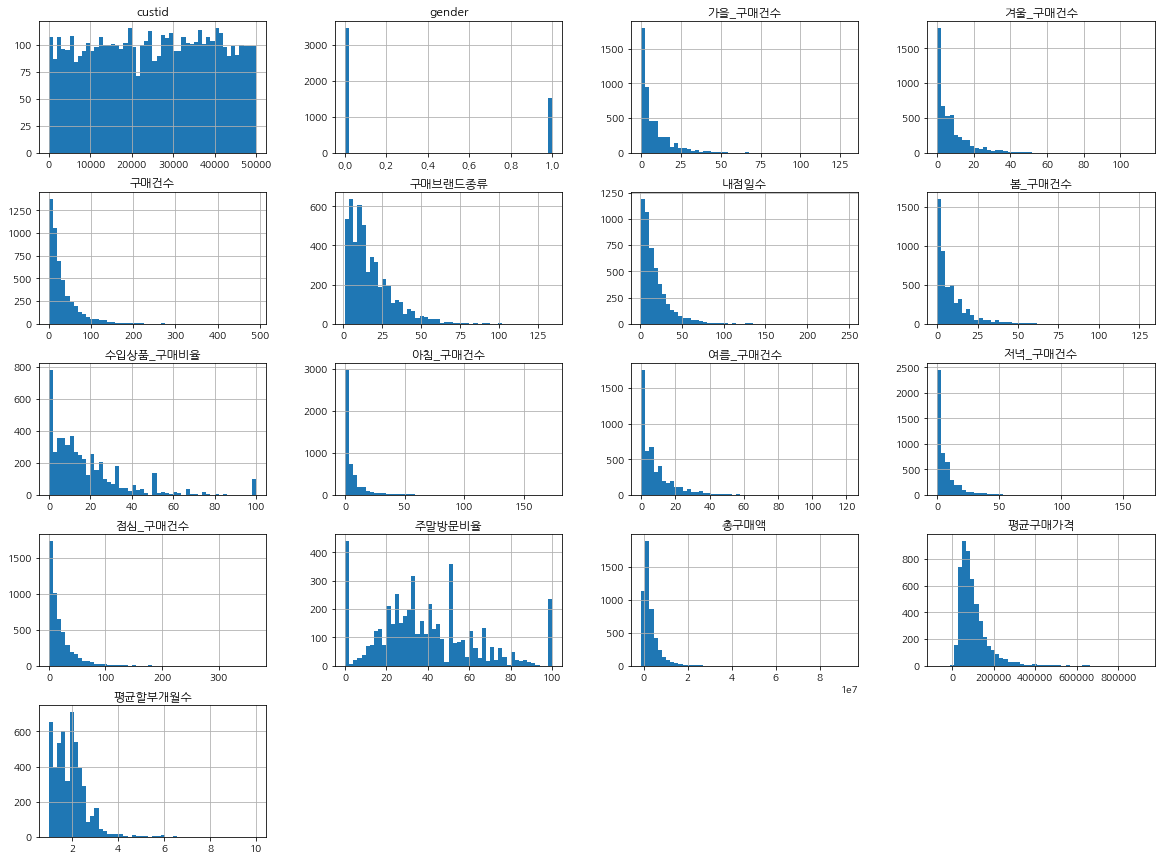

In [16]:
# 데이터의 전반적인 특성을 파악
train.hist(bins=50, figsize=(20,15))

#  히스토그램에 대한 분석 및 가정
1. custid
    - 특정 문자열이나 언어가 아닌 가입 순서에 따른 아이디 순차배정으로 추측
    - gender의 특성을 판단하는데 큰 도움이 되지 않을것이라 판단
    
    
    
2. gender 
    - 0 을 여성, 1을 남성 으로 전제, 여성이 남성에 비해 크게 높은 비중을 차지함
    - 이후 여성과 남성을 판단하는데 문제점이 발생할 수도 있음을 암시
    - 데이터의 정규화가 필요함




3. 전반적인 횟수에 대한 그래프가 0에 가까울수록 큰 비중을 나타냄
    - 구매건수, 내점일수 등 어떠한 횟수와 관계있는 컬럼의 경우 0에 가까울수록 큰 값을 지님. 




4. 비율과 관련된 그래프의 경우 비교적 넓은 분포를 지님
    - 최대/최소값의 존재로 인해 그 한계가 정해져있지만, 중위값과 최대/최소값이 존재하는 이점을 지님
    
    
    
    
5. 평균 과 관련된 컬럼의 경우 좁지만 나름의 곡선을 지님

In [23]:
# train data 내에서 gender 컬럼과의 유효성을 알아보자.
train.corr()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
custid,1.000000,0.262472,0.217251,0.218914,0.117939,0.093048,0.154303,0.212969,-0.017958,-0.162393,0.169628,0.164004,0.189248,0.209086,0.170199,0.025959,0.245526
gender,0.262472,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,0.082396,0.062853,0.073478,0.098237,0.117025,-0.017439,0.098814
총구매액,0.217251,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,0.636912,0.598012,0.621589,0.600210,0.411808,0.375806,0.705898
구매건수,0.218914,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,0.890560,0.872558,0.891125,0.879405,0.643542,0.631686,0.944120
평균구매가격,0.117939,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,-0.030972,-0.054408,-0.051558,-0.056996,-0.045784,-0.096015,-0.025700
평균할부개월수,0.093048,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,-0.015512,-0.037181,-0.029433,-0.035267,-0.061617,-0.056620,-0.006523
구매브랜드종류,0.154303,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,0.753557,0.752453,0.768225,0.732592,0.544562,0.557397,0.809973
내점일수,0.212969,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,0.827788,0.820413,0.832312,0.814047,0.603499,0.622984,0.873686
수입상품_구매비율,-0.017958,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,-0.143282,-0.159061,-0.170131,-0.154914,-0.102365,-0.150986,-0.175920
주말방문비율,-0.162393,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,-0.093130,-0.091832,-0.083555,-0.100046,-0.102636,-0.027938,-0.100132


In [24]:
# gender 와의 상관계수 정렬
# 전반적으로 저조한 상관계수
# 가장 큰 상관계수를 지닌 '아침_구매건수' 확인
pd.DataFrame(abs(train.corr()['gender']).sort_values(ascending = False))

,gender
gender,1.000000
custid,0.262472
아침_구매건수,0.117025
총구매액,0.099137
점심_구매건수,0.098814
여름_구매건수,0.098237
구매건수,0.094022
내점일수,0.084255
구매브랜드종류,0.083988
가을_구매건수,0.082396


Text(0.5, 1.0, '점심_구매건수 vs gender')

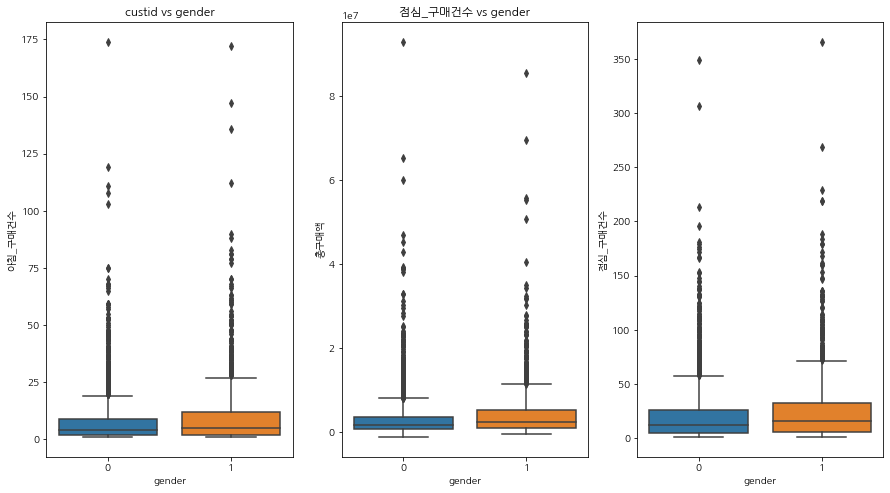

In [26]:
f, axes = plt.subplots(ncols=3, figsize=(15,8))

sns.boxplot(x='gender', y='아침_구매건수', data=train, ax=axes[0])
axes[0].set_title("custid vs gender")

sns.boxplot(x='gender', y='총구매액', data=train, ax=axes[1])
axes[1].set_title("아침_구매건수 vs gender")

sns.boxplot(x='gender', y='점심_구매건수', data=train, ax=axes[2])
axes[1].set_title("점심_구매건수 vs gender")

Text(0.5, 1.0, '점심_구매건수 vs gender')

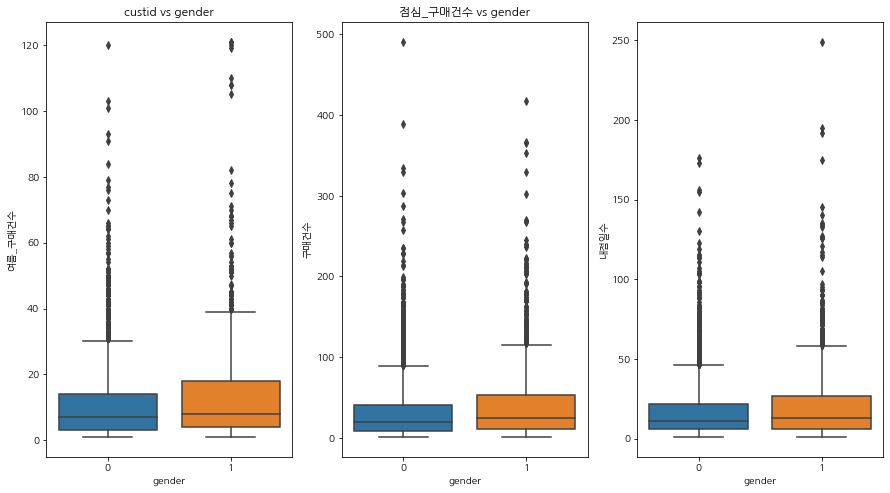

In [27]:
f, axes = plt.subplots(ncols=3, figsize=(15,8))

sns.boxplot(x='gender', y='여름_구매건수', data=train, ax=axes[0])
axes[0].set_title("custid vs gender")

sns.boxplot(x='gender', y='구매건수', data=train, ax=axes[1])
axes[1].set_title("아침_구매건수 vs gender")

sns.boxplot(x='gender', y='내점일수', data=train, ax=axes[2])
axes[1].set_title("점심_구매건수 vs gender")

Text(0.5, 1.0, '점심_구매건수 vs gender')

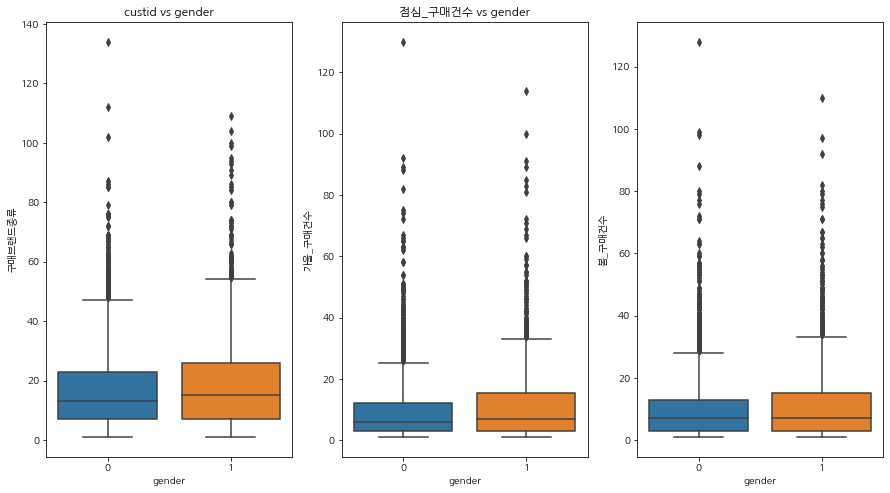

In [28]:
f, axes = plt.subplots(ncols=3, figsize=(15,8))

sns.boxplot(x='gender', y='구매브랜드종류', data=train, ax=axes[0])
axes[0].set_title("custid vs gender")

sns.boxplot(x='gender', y='가을_구매건수', data=train, ax=axes[1])
axes[1].set_title("아침_구매건수 vs gender")

sns.boxplot(x='gender', y='봄_구매건수', data=train, ax=axes[2])
axes[1].set_title("점심_구매건수 vs gender")

Text(0.5, 1.0, '점심_구매건수 vs gender')

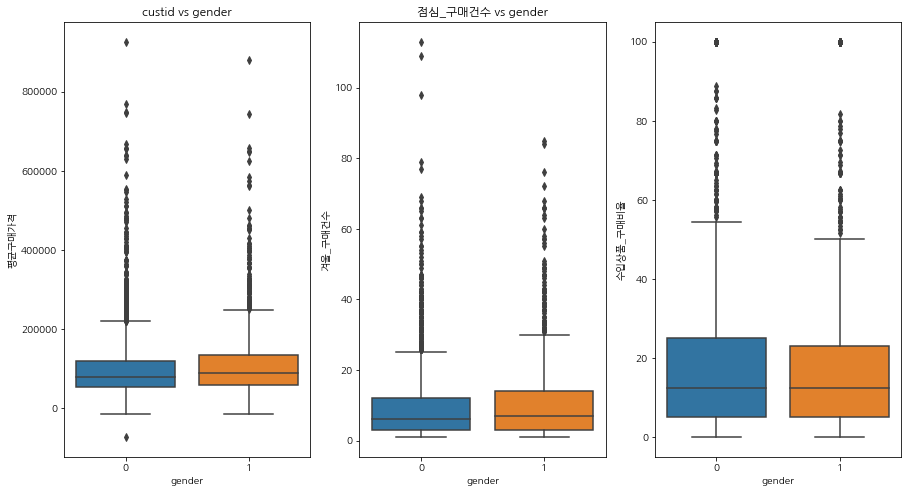

In [29]:
f, axes = plt.subplots(ncols=3, figsize=(15,8))

sns.boxplot(x='gender', y='평균구매가격', data=train, ax=axes[0])
axes[0].set_title("custid vs gender")

sns.boxplot(x='gender', y='겨울_구매건수', data=train, ax=axes[1])
axes[1].set_title("아침_구매건수 vs gender")

sns.boxplot(x='gender', y='수입상품_구매비율', data=train, ax=axes[2])
axes[1].set_title("점심_구매건수 vs gender")

Text(0.5, 1.0, '점심_구매건수 vs gender')

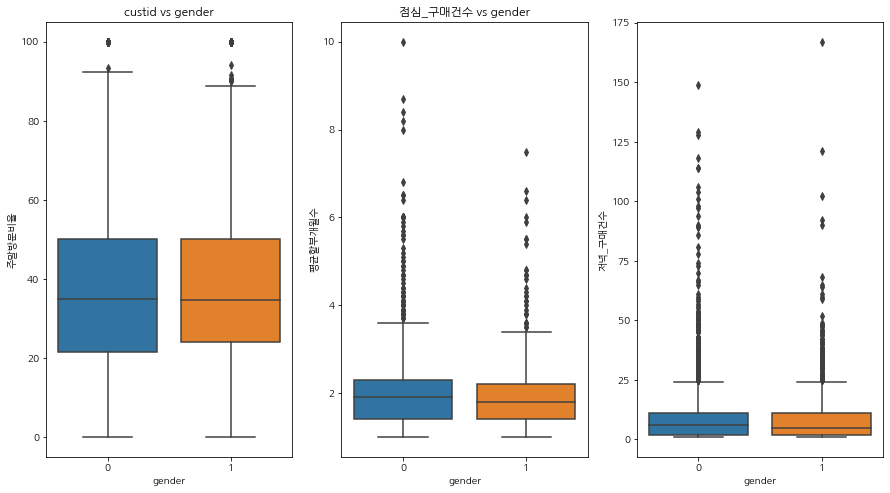

In [30]:
f, axes = plt.subplots(ncols=3, figsize=(15,8))

sns.boxplot(x='gender', y='주말방문비율', data=train, ax=axes[0])
axes[0].set_title("custid vs gender")

sns.boxplot(x='gender', y='평균할부개월수', data=train, ax=axes[1])
axes[1].set_title("아침_구매건수 vs gender")

sns.boxplot(x='gender', y='저녁_구매건수', data=train, ax=axes[2])
axes[1].set_title("점심_구매건수 vs gender")

## boxplot 으로 시각화 해 본 결과
 - gender 를 특정 컬럼을 기준으로 나누기엔 그 기준이 되어주기에 적합한 컬럼이 존재하지 않음
 - 즉, 상관관계가 매우 낮음. 
 - 현재 정보만으로는 단순한 머신러닝을 돌렸을 경우 그 결과가 썩 좋지 않을것으로 예상
 - 크게 두 갈래의 해결방안이 존재할것으로 예측, 
     > 첫째, 유효한 새로운 컬럼의 생성 및 선택
     
     > 둘째, 이 모든것을 수용할만한 강력한 머신러닝 모델의 선택.

# 2. 구매상품에 대한 남여의 구분

In [40]:
# 남성과 여성에 대한 주구매코너를 각각 분류해서 그룹화
# 중복되는 값이 존재하지 않는 custid 를 이용해 카운트

gender_major = train.groupby(['gender', '주구매코너'])['custid'].agg('count').to_frame()
gender_major

custid
gender 주구매코너           
0      가구             6
       가전            13
       기타바이어          9
       니트단품          74
       도자기크리스탈        6
       디자이너부띠끄       38
       문화완구          21
       섬유            75
       수입명품          85
       스포츠          180
       엘레강스캐주얼       60
       영캐주얼         196
       유니캐주얼        301
       유아동복         241
       일반식품         854
       장신구           52
       정장셔츠          45
       조리욕실          24
       침구수예           7
       캐릭터캐주얼       140
       타운모피           4
       트래디셔널캐주얼      57
       피혁A           46
       피혁B           46
       화장품          899
1      가구             1
       가전             5
       기타바이어          3
       니트단품          17
       도자기크리스탈        5
       디자이너부띠끄       13
       문화완구          17
       섬유            21
       수입명품          51
       스포츠          121
       엘레강스캐주얼       18
       영캐주얼          50
       유니캐주얼        109
       유아동복         142
       일반식품         452
       장신구           16
       정장셔츠          45
       조리욕실           4
       침구수예           1
       캐릭터캐주얼        48
       타운모피           2
       트래디셔널캐주얼      34
       피혁A           29
       피혁B           10
       화장품          307

In [44]:
# 시각화가 가능하도록 새로운 데이터프레임으로 설정

df_major = gender_major.reset_index()
df_major

,gender,주구매코너,custid
0,0,가구,6
1,0,가전,13
2,0,기타바이어,9
3,0,니트단품,74
4,0,도자기크리스탈,6
5,0,디자이너부띠끄,38
6,0,문화완구,21
7,0,섬유,75
8,0,수입명품,85
9,0,스포츠,180


In [47]:
# custid 의 이름을 counts 로 변경
df_major.columns = ['gender', '주구매코너', 'counts']

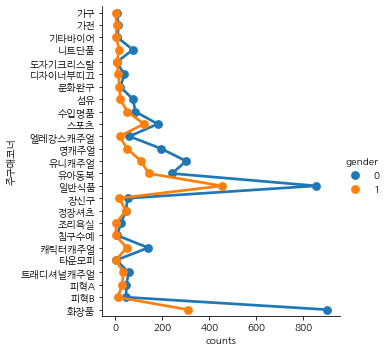

In [48]:
sns.factorplot('counts', '주구매코너', hue='gender', data=df_major)

In [53]:
pd.crosstab(train['주구매코너'], train['gender'], margins=True)

gender,0,1,All
주구매코너,,,
가구,6,1,7
가전,13,5,18
기타바이어,9,3,12
니트단품,74,17,91
도자기크리스탈,6,5,11
디자이너부띠끄,38,13,51
문화완구,21,17,38
섬유,75,21,96
수입명품,85,51,136


# 결과 예측
 - 여성의 경우 화장품>일반식품>유니캐주얼>유아동복 순서로 우선순위가 나타남
 - 남성의 경우 일반식품>화장품>유아동복>유니캐주얼 순서로 우선순위가 나타남
 - 전체 순위는 일반식품 > 화장품 순서

In [55]:
# 주구매코너 One-Hot Encoding
train[['주구매코너']] = train[['주구매코너']].apply(lambda x: x.astype('category').cat.codes) 

# [ 일단 닥치고 돌려봅시다 ]

In [62]:
from sklearn.model_selection import train_test_split
cp_train = train.copy()
dfX = cp_train.drop(['custid', 'gender'], axis=1)
dfy = cp_train['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)

display(X_train.shape, X_test.shape)
X_train

(3750, 16)

(1250, 16)

,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
4154,404285,3,134762,2.3,3,2,33.3,0.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,22
4820,6169420,38,162353,2.1,29,26,13.2,34.6,8.0,13.0,7.0,10.0,13.0,0.0,25.0,10
1202,2407157,32,75224,1.7,22,17,9.4,52.9,3.0,3.0,6.0,20.0,3.0,8.0,21.0,14
3759,4664283,78,59798,1.8,24,22,1.3,45.5,17.0,12.0,29.0,20.0,0.0,23.0,55.0,14
622,3299200,11,299927,1.9,9,3,45.5,33.3,0.0,0.0,11.0,0.0,0.0,0.0,11.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,7326999,143,51238,1.2,15,115,2.8,33.9,57.0,15.0,20.0,51.0,6.0,38.0,99.0,14
3264,152000,1,152000,3.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24
1653,148000,4,37000,1.0,3,4,50.0,25.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,24
2607,1623380,12,135282,1.3,11,8,8.3,12.5,2.0,0.0,4.0,6.0,1.0,1.0,10.0,11


In [75]:
from sklearn.tree import DecisionTreeClassifier
import mglearn

dt_model = DecisionTreeClassifier(random_state=0)

dt_model.fit(X_train, y_train)
display(dt_model.score(X_train, y_train))
display(dt_model.score(X_test, y_test))

0.9997333333333334

0.5848

In [76]:
# 만약 데이터를 표준화하여 돌린다면?

from sklearn.preprocessing import StandardScaler

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=0)

dt_model.fit(X_train, y_train)
display(dt_model.score(X_train, y_train))
display(dt_model.score(X_test, y_test))

0.9997333333333334

0.5848

In [77]:
# 정확도는? 

from sklearn.metrics import accuracy_score

y_pred_tr = dt_model.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.58
